# Hola Gelber! <a class="tocSkip"></a>

Mi nombre es Enrique Romero y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from scipy import stats as st

visitas = pd.read_csv('/datasets/visits_log_us.csv')
ordenes  = pd.read_csv("/datasets/orders_log_us.csv")
costos = pd.read_csv('/datasets/costs_us.csv')


<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Debes separar la celda de carga de librerias y carga de datos en dos distintas celdas, es parte de nuestras buenas practicas
</div>

# Introduccion

Este Proyecto se realizara con el fin de poder demostrar mis conocimientos sobre el sprint # 7. procedere a realizar las distintas investigaciones de mercado que el proyecto exige.
incursuionare en el departamento analítico de Y.Afisha. hare investigacion del uso de los recursos y las respectivos gastos con el fin de  ayudar a optimizar los gastos de marketing.

### 1. Descarga los datos y prepáralos para el análisis

In [2]:
visitas

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


- Uid :  identificador único del usuario
- Device: dispositivo del usuario
- Start Ts: fecha y hora de inicio de la sesión
- End Ts: fecha y hora de término de la sesión
- Source Id: identificador de la fuente de anuncios de la que proviene el usuario.

Se realizo un ajuste en el tipo de datos para las columnas "Device", "End Ts" y "Stars Ts". del dataframe Visitas. ya que los datos venian con informacion incorrecta en el tema de las fechas sobre todo.

In [3]:
visitas['Device'] = visitas['Device'].astype('category')
visitas['End Ts'] =  pd.to_datetime(visitas['End Ts'], format="%Y.%m.%d %H:%M")
visitas['Start Ts'] =  pd.to_datetime(visitas['Start Ts'], format="%Y.%m.%d %H:%M")

In [4]:
visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [5]:
display(ordenes)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


- Uid: identificador único del usuario que realiza un pedido
- Buy Ts: fecha y hora del pedido
- Revenue: ingresos de Y.Afisha de este pedido.

Se realizo un cambio en la columna "Buy Ts" para que fuera Datetime.

In [6]:
ordenes["Buy Ts"] =  pd.to_datetime(ordenes["Buy Ts"], format="%Y.%m.%d %H:%M")

In [7]:
ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [8]:
display(costos)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


- source_id: identificador de la fuente de anuncios
- dt: fecha;
- costs: gastos en esta fuente de anuncios en este día.

Se realizo el cambio de tipo de datos en la columna "dt" por dataframe

In [9]:
costos["dt"] =  pd.to_datetime(costos["dt"], format="%Y.%m.%d")

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto, me parece buena forma de introducir los datos, veo que más adelante utilizas info() que es una muy buena forma de ver qué contienen
</div>

In [10]:
costos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


## 2. Haz informes y calcula métricas 

### Producto:


In [11]:
visitas['mes'] = visitas["Start Ts"].astype('datetime64[M]')
visitas['dia'] = visitas["Start Ts"].astype('datetime64[D]')
visitas['semana'] = visitas["Start Ts"].astype('datetime64[W]')
visitas


,Device,End Ts,Source Id,Start Ts,Uid,mes,dia,semana
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-20,2017-12-14
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-19,2018-02-15
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01,2017-06-29
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-05-20,2018-05-17
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,2017-12-27,2017-12-21
...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-01,2017-07-29,2017-07-27
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-01,2018-01-25,2018-01-25
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-01,2018-03-03,2018-03-01
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-01,2017-11-02,2017-11-02


Realizamos 3 nuevas columnas en el dataframe con la distribuccion de fechas por dia, mes y semana. esto con el fin de poder dar a conocer la cantidad de visitas que hay por estos 3 segmentos.

### ¿Cuántas personas lo usan cada día, semana y mes?

In [12]:
users_dia = (
    visitas.groupby('dia')
    .agg({'Uid': ['nunique']})
    .sort_values(by=('Uid', 'nunique'), ascending=False)
)

users_dia.head()

,Uid
,nunique
dia,
2017-11-24,3319
2018-05-31,1997
2017-11-25,1817
2018-02-01,1640
2018-03-26,1609


Podemos observar que el dia donde mas usuarios utilizaron el servicio fue el 24 de noviembre de 2017, con 3.319 visitas. seguido del 31 de Mayo 2018, con 1.997 visitas.

In [13]:
users_semana = (
    visitas.groupby('semana')
    .agg({'Uid': ['nunique']})
    .sort_values(by=('Uid', 'nunique'), ascending=False)
)

users_semana.head()

,Uid
,nunique
semana,
2017-11-23,10716
2017-12-07,8575
2018-03-22,8486
2017-11-16,8294
2018-02-08,8218


Para el caso de las semanas, donde mas visitas hubieron fue la semana que inicio el 23 de noviembre de 2017 con 10.716 visitas. es congruente ya que en esa semana se encuentra el dia donde mas visitas hubieron.

In [14]:
users_mes = (
    visitas.groupby('mes')
    .agg({'Uid': ['nunique']})
    .sort_values(by=('Uid', 'nunique'), ascending=False)
)

users_mes

,Uid
,nunique
mes,
2017-11-01,32797
2017-12-01,31557
2017-10-01,29692
2018-02-01,28749
2018-01-01,28716
2018-03-01,27473
2018-04-01,21008
2018-05-01,20701


El mes de noviembre y diciembre de 2017 fue donde hubo el top de visitas a la paguina web.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien!
</div>

### ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).

In [15]:
sesiones_dia = visitas.groupby('dia')[["Uid"]].count()
sesiones_dia.sort_values(by ="Uid",ascending = False)


,Uid
dia,
2017-11-24,4042
2018-05-31,2256
2017-11-25,2089
2018-02-01,1878
2018-03-26,1796
...,...
2017-08-06,296
2017-08-12,296
2017-08-13,293


para este caso retiramos el nunique de la columna Uid. ya que hay usuarios que depronto ingresan varias veces al dia a la plataforma, podemos observar que para el dia 24 de nov 2017 fue donde mas sesiones hubieron. en total 4042 pero podemos hacer una comparacion con la informacion pasada por usuarios unicos que habia sido 3.319 visitas por usuario. es decir 723 sesiones de ese dia fueron hechas por usuarios que ingresaron doble vez ese dia .



### Duracion de sesion por usuario

In [16]:
visitas["duracion_sesion"] =  visitas["End Ts"] - visitas["Start Ts"]
visitas

,Device,End Ts,Source Id,Start Ts,Uid,mes,dia,semana,duracion_sesion
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-20,2017-12-14,0 days 00:18:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-19,2018-02-15,0 days 00:28:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01,2017-06-29,0 days 00:00:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-05-20,2018-05-17,0 days 00:24:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,2017-12-27,2017-12-21,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-01,2017-07-29,2017-07-27,0 days 00:00:19
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-01,2018-01-25,2018-01-25,0 days 00:00:19
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-01,2018-03-03,2018-03-01,0 days 00:00:19
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-01,2017-11-02,2017-11-02,0 days 00:00:19


In [17]:
duracion_sesion= visitas["duracion_sesion"].mean()
duracion_sesion

Timedelta('0 days 00:10:43.025687256')

Podemos observar la nueva columna duracion_sesion la cual contiene el tiempo que el usuario demoro en cada una se los ingresos que tubo en la plataforma. haciendo un promedio por el total de los meses podemos observar que en promedio estubieron 10 Minutos y 43 segundos.

### ¿Con qué frecuencia los usuarios y las usuarias regresan?

In [18]:
visitas_frecuencia = visitas

first_purchase_dates = visitas_frecuencia.groupby('Uid')[
    'Start Ts'
].min()
first_purchase_dates.name = 'first_purchase_datetime'
visitas_frecuencia = visitas_frecuencia.join(first_purchase_dates, on='Uid')
visitas_frecuencia['purchase_month'] = visitas_frecuencia['Start Ts'].astype(
'datetime64[M]'
)
visitas_frecuencia['first_purchase_month'] = visitas_frecuencia[
'first_purchase_datetime'
].astype('datetime64[M]')

display(visitas_frecuencia)

,Device,End Ts,Source Id,Start Ts,Uid,mes,dia,semana,duracion_sesion,first_purchase_datetime,purchase_month,first_purchase_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,2017-12-20,2017-12-14,0 days 00:18:00,2017-12-20 17:20:00,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,2018-02-19,2018-02-15,0 days 00:28:00,2018-02-19 16:53:00,2018-02-01,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01,2017-06-29,0 days 00:00:00,2017-07-01 01:54:00,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,2018-05-20,2018-05-17,0 days 00:24:00,2018-03-09 20:05:00,2018-05-01,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,2017-12-27,2017-12-21,0 days 00:00:00,2017-12-27 14:06:00,2017-12-01,2017-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-01,2017-07-29,2017-07-27,0 days 00:00:19,2017-07-29 19:07:00,2017-07-01,2017-07-01
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-01,2018-01-25,2018-01-25,0 days 00:00:19,2018-01-25 17:38:00,2018-01-01,2018-01-01
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-01,2018-03-03,2018-03-01,0 days 00:00:19,2018-03-03 10:12:00,2018-03-01,2018-03-01
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-01,2017-11-02,2017-11-02,0 days 00:00:19,2017-11-02 10:12:00,2017-11-01,2017-11-01


In [19]:
v = visitas_frecuencia.pivot_table(
index='first_purchase_month',
columns='purchase_month',
values={'Uid': ['nunique']},
aggfunc='count',
)
v

Uid                                              \
purchase_month       2017-06-01 2017-07-01 2017-08-01 2017-09-01 2017-10-01   
first_purchase_month                                                          
2017-06-01              16505.0     2412.0     1758.0     2260.0     2679.0   
2017-07-01                  NaN    15416.0     1156.0     1168.0     1280.0   
2017-08-01                  NaN        NaN    11441.0     1201.0     1025.0   
2017-09-01                  NaN        NaN        NaN    19278.0     2190.0   
2017-10-01                  NaN        NaN        NaN        NaN    30729.0   
2017-11-01                  NaN        NaN        NaN        NaN        NaN   
2017-12-01                  NaN        NaN        NaN        NaN        NaN   
2018-01-01                  NaN        NaN        NaN        NaN        NaN   
2018-02-01                  NaN        NaN        NaN        NaN        NaN   
2018-03-01                  NaN        NaN        NaN        NaN        NaN   
2018-04-01                  NaN        NaN        NaN        NaN        NaN   
2018-05-01                  NaN        NaN        NaN        NaN        NaN   

                                                                             \
purchase_month       2017-11-01 2017-12-01 2018-01-01 2018-02-01 2018-03-01   
first_purchase_month                                                          
2017-06-01               2972.0     2714.0     2232.0     2109.0     1981.0   
2017-07-01               1395.0     1079.0      938.0      959.0      813.0   
2017-08-01               1046.0      899.0      755.0      613.0      727.0   
2017-09-01               1931.0     1402.0      977.0      951.0      901.0   
2017-10-01               3309.0     2116.0     1481.0     1280.0     1197.0   
2017-11-01              33316.0     3801.0     2221.0     1873.0     1422.0   
2017-12-01                  NaN    29972.0     2274.0     1490.0     1167.0   
2018-01-01                  NaN        NaN    26061.0     2275.0     1446.0   
2018-02-01                  NaN        NaN        NaN    25632.0     1988.0   
2018-03-01                  NaN        NaN        NaN        NaN    24037.0   
2018-04-01                  NaN        NaN        NaN        NaN        NaN   
2018-05-01                  NaN        NaN        NaN        NaN        NaN   

                                            
purchase_month       2018-04-01 2018-05-01  
first_purchase_month                        
2017-06-01               1623.0     1618.0  
2017-07-01                596.0      570.0  
2017-08-01                505.0      459.0  
2017-09-01                583.0      582.0  
2017-10-01                781.0      789.0  
2017-11-01                863.0      887.0  
2017-12-01                675.0      680.0  
2018-01-01                757.0      650.0  
2018-02-01                784.0      695.0  
2018-03-01               1338.0      894.0  
2018-04-01              18010.0     1350.0  
2018-05-01                  NaN    17461.0

<AxesSubplot:title={'center':'Frecuencia de usuarios que regresan'}, xlabel='None-purchase_month', ylabel='first_purchase_month'>

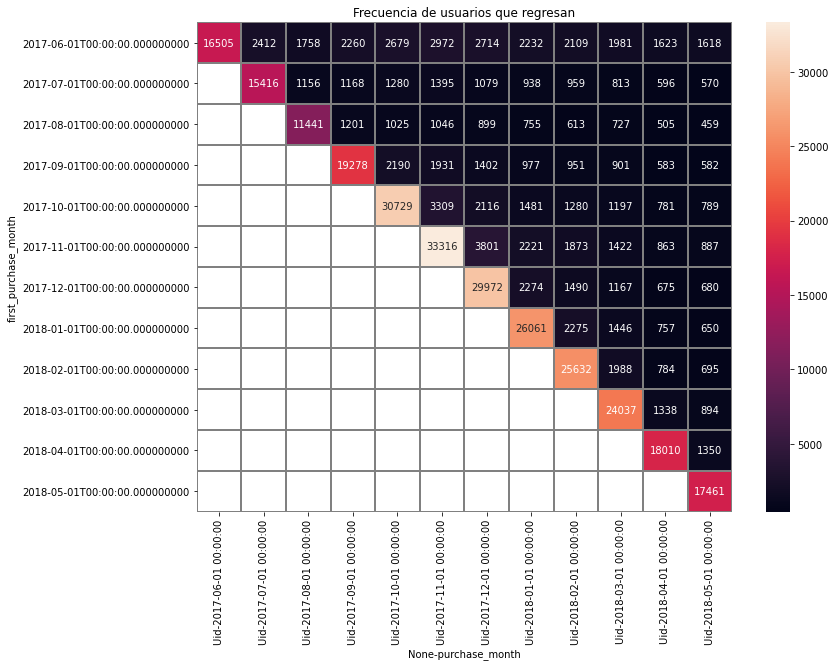

In [20]:

plt.figure(figsize=(12, 9))
plt.title('Frecuencia de usuarios que regresan')
sns.heatmap(
v,
annot=True,
fmt='.0f',
linewidths=1,
linecolor='gray',
)


Observamos que al hacer un cohorte por mes comienza a reducir sustancialmente a lo largo de los meses. ejemplo para el mes de agosto de 2017 habian 11.441 usuarios y para el siguiente mes solo siguiern 1.201 fue un bajon tremendo. lo mismo sucede para todos los meses. el unico aumento que se ve es para el cohorte del mes de junio de 2017 el cual para el mes de octubre crecio. paso de 2.260 en septiembre a 2.679 para octubre y 2.972 Noviembre.

### Ventas:
 




### ¿Cuándo la gente empieza a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el/la usuario/a se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el/la usuario/a podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d.  Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo).

In [21]:

Primer_registro = visitas.groupby('Uid')[
    'Start Ts'
].min()

Primer_registro

ventas= pd.merge(Primer_registro, ordenes, on='Uid')

ventas['Start Ts'] = ventas['Start Ts'].astype(
    'datetime64[M]'
)
ventas['Buy Ts'] = ventas['Buy Ts'].astype('datetime64[M]')
ventas["tiempo"] = ventas["Buy Ts"] - ventas["Start Ts"]

ventas



,Uid,Start Ts,Buy Ts,Revenue,tiempo
0,313578113262317,2017-09-01,2018-01-01,0.55,122 days
1,1575281904278712,2017-06-01,2017-06-01,1.22,0 days
2,1575281904278712,2017-06-01,2017-06-01,1.83,0 days
3,2429014661409475,2017-10-01,2017-10-01,73.33,0 days
4,2464366381792757,2018-01-01,2018-01-01,2.44,0 days
...,...,...,...,...,...
50410,18445407535914413204,2017-09-01,2017-09-01,0.24,0 days
50411,18445407535914413204,2017-09-01,2017-09-01,0.12,0 days
50412,18445601152732270159,2017-08-01,2018-03-01,4.22,212 days
50413,18446156210226471712,2017-11-01,2018-02-01,9.78,92 days


In [22]:
tiempoenhacercompras= ventas.groupby('tiempo')[["Uid"]].count()
tiempoenhacercompras.sort_values(by ="Uid",ascending = False).head(10)

,Uid
tiempo,
0 days,33994
31 days,2208
30 days,1984
61 days,1733
92 days,1369
153 days,897
122 days,813
151 days,517
183 days,500


33.994 usuarios realizaron la compra el dia q inciaron secion por primera vez. lo cual nos muestra que gran mayoria de los usuarios prefieren ingresar y crear su usuario y de una vez realizar la compra.

### ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [23]:
pedidos = ventas.groupby('Buy Ts').agg(
    {'Uid': 'nunique','Revenue' : 'sum'}
)
display(pedidos)


,Uid,Revenue
Buy Ts,,
2017-06-01,2023,9557.49
2017-07-01,1984,12539.47
2017-08-01,1472,8758.78
2017-09-01,2750,18345.51
2017-10-01,4675,27987.70
2017-11-01,4547,27069.93
2017-12-01,4942,36388.60
2018-01-01,3898,19417.13
2018-02-01,4258,25560.54


podemos ver que el mes donde mas pedidos se realizan es en Diciembre 2017 con 4942 pedidos representando un ingreso de 36388.60 Usd

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Sugerencia, usar to_period('M') o por ejemplo astype('datetime64[M]') para obtener el mes es muy bueno (o W para semanas), así se mantiene el orden de meses incluso si son de diferentes años. Si solo se extrajera el número de mes con dt.month, entonces se confunden meses de diferentes años
</div>

### ¿Cuál es el tamaño promedio de compra?

In [24]:
pedidos["promedio"]= pedidos["Revenue"] / pedidos["Uid"] 
pedidos

,Uid,Revenue,promedio
Buy Ts,,,
2017-06-01,2023,9557.49,4.724414
2017-07-01,1984,12539.47,6.320297
2017-08-01,1472,8758.78,5.950258
2017-09-01,2750,18345.51,6.671095
2017-10-01,4675,27987.70,5.986674
2017-11-01,4547,27069.93,5.953360
2017-12-01,4942,36388.60,7.363132
2018-01-01,3898,19417.13,4.981306
2018-02-01,4258,25560.54,6.002945


podemos observar que el costo promedio de cada articulo osila entre lo 5 y 7 dolares.

### ¿Cuánto dinero traen? (LTV)

In [25]:
v1= ventas.pivot_table(
index='Start Ts',
columns="Buy Ts",
values='Revenue',
aggfunc='nunique',
)


<AxesSubplot:title={'center':'Ingresos por Cliente'}, xlabel='Buy Ts', ylabel='Start Ts'>

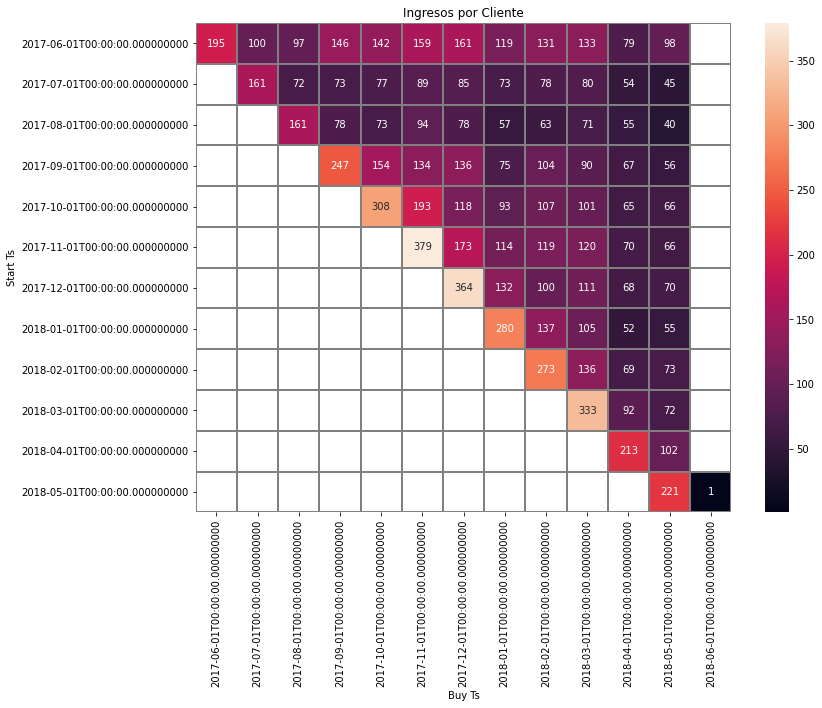

In [26]:
plt.figure(figsize=(12, 9))
plt.title('Ingresos por Cliente')
sns.heatmap(
v1,
annot=True,
fmt='.0f',
linewidths=1,
linecolor='gray',
)

Podemos observar como los clientes del cohorte Junio 2017 son los que mas dinero ha aportado en promedio a la compañia a lo largo de los meses como clientes. para el cohorte Nov de  2017 se registraron clientes nuevos que generaron buen ingreso , pero para los ultimos dos meses no han vuelto a comprar y el indice bajo.


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien con este gráfico!, me gustaria ver mas tipos de graficos similares o con las variaciones de barras y lineas
</div>

### Marketing:
 

### ¿Cuánto dinero se gastó? (Total/por fuente/a lo largo del tiempo)

In [30]:
costos["dt"].describe()

/tmp/ipykernel_122/905783754.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  costos["dt"].describe()


count                    2542
unique                    364
top       2017-06-28 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

In [31]:
costos["costs"].sum()

329131.62

In [46]:
costosxmes= costos.groupby('month')[["costs"]].sum().sort_values(by ="costs",ascending = False)
costosxmes

,costs
month,
2017-12-01,38315.35
2017-11-01,37907.88
2017-10-01,36322.88
2018-01-01,33518.52
2018-02-01,32723.03
2018-03-01,30415.27
2017-09-01,24368.91
2018-04-01,22289.38
2018-05-01,22224.27


desde el 2017-06-01  hasta el 2018-05-31 se han gastado 329.131 Usd en Marketing , el mes en el que mas se invirtio publicidad fue el mes de Diciembre 2017 con 38.315 usd seguido de Noviembre del mismo Año. usualmente en estos dos meses fue donde mas visitas tubo la paguina web.

### ¿Cuánto costó la adquisición de clientes de cada una de las fuentes?

In [33]:
ordenes['order_month'] = ordenes['Buy Ts'].astype('datetime64[M]')
costos['month'] = costos['dt'].astype('datetime64[M]')

In [34]:
first_orders = ordenes.groupby('Uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['Uid', 'first_order_month']
first_orders.head()

,Uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [35]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [36]:
orders_ = pd.merge(ordenes,first_orders, on='Uid')
orders_.head()

,Buy Ts,Revenue,Uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


In [37]:
cohorts = orders_.groupby(['first_order_month','order_month']).agg({'Revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,order_month,Revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [38]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,Revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [39]:
margin_rate = 0.5

report['gp'] = report['Revenue'] * margin_rate
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head()

,first_order_month,n_buyers,order_month,Revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0
1,2017-06-01,2023,2017-07-01,981.82,490.910,1
2,2017-06-01,2023,2017-08-01,885.34,442.670,2
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4


In [40]:
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).round()

output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-07-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
2017-08-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,
2017-09-01,3.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,,,
2017-10-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,
2017-11-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,
2017-12-01,2.0,0.0,0.0,1.0,0.0,0.0,,,,,,
2018-01-01,2.0,0.0,0.0,0.0,0.0,,,,,,,
2018-02-01,2.0,0.0,0.0,0.0,,,,,,,,


In [41]:
# obtener la cohorte necesaria
cohort_201803 = report[report['first_order_month'] == '2017-06-01']

# calcular los costos para el mes de la cohorte
costs_201803 = costos[costos['month'] == '2017-06-01']['costs'].sum()

n_buyers_201803 = cohort_201803['n_buyers'][0]
cac_201803 = costs_201803 / n_buyers_201803


print('CAC =', cac_201803)


CAC = 8.905091448344043


8,9 USD cuesta adquirir a cada cliente

### ¿Cuán rentables eran las inversiones? (ROI)
Traza gráficos para mostrar cómo difieren estas métricas para varios dispositivos y fuentes de anuncios y cómo cambian con el tiempo. 

In [42]:
monthly_costs = costos.groupby('month').sum()
monthly_costs.head()

,source_id,costs
month,,
2017-06-01,1020,18015.00
2017-07-01,1054,18240.59
2017-08-01,1054,14790.54
2017-09-01,1020,24368.91
2017-10-01,1054,36322.88


calculamos los costos por mes

In [43]:
report_ = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.head()

,first_order_month,n_buyers,order_month,Revenue,gp,age,ltv,source_id,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,1020,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664,1020,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,442.670,2,0.218819,1020,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3,0.477336,1020,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4,0.511265,1020,18015.0,8.905091


In [44]:
report_['romi'] = report_['ltv'] / report_['cac']
output = report_.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
)

output.cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.27,0.29,0.32,0.37,0.43,0.47,0.52,0.56,0.59,0.62,0.65,0.67
2017-07-01,0.32,0.33,0.37,0.39,0.40,0.40,0.41,0.42,0.43,0.43,0.44,NaN
2017-08-01,0.24,0.27,0.29,0.31,0.33,0.34,0.35,0.37,0.38,0.39,NaN,NaN
2017-09-01,0.30,0.36,0.39,0.60,0.62,0.65,0.69,0.70,0.71,NaN,NaN,NaN
2017-10-01,0.30,0.33,0.34,0.35,0.36,0.37,0.37,0.38,NaN,NaN,NaN,NaN
2017-11-01,0.28,0.30,0.31,0.33,0.34,0.34,0.34,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.27,0.29,0.34,0.40,0.42,0.44,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.21,0.22,0.24,0.25,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.23,0.25,0.25,0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


se realizo una division entre los costos por mes de marketing y los ingresos de nuevos compradores lo cual nos muestra la tabla dinamica de la parte de arriba. lo alarmante es que al dar menos de 1 nos quiere decir que hay perdidas.

In [45]:
output.cumsum(axis=1).mean(axis=0)

age
0     0.270408
1     0.290992
2     0.315535
3     0.359870
4     0.391473
5     0.429938
6     0.448410
7     0.484976
8     0.526936
9     0.482244
10    0.547329
11    0.666991
dtype: float64

En promedio, las cohortes no compensan al final del mes 11 ya que para que compense debe estar por encima de 1. el negocio no es prospero ya que no tiene la cantidad necesaria de clientes para que las ventas sean mejores, adicional el indice de personas que compran y no generar recompra es bastante. como se puede observar en el grafico de Frecuencia de usuarios que Regresan.


### Paso 3. Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde

Observando que el Retorno de la inversion no se ha dado en los primeros 11 meses de iniciado el proyecto realmente se tienen que hacer cambios. uno de los mas importantes es el del gasto de Marketing ya que cada usuario nuevo le cuesta a la empresa una inversion de 8,9 Usd . es bastante para un solo usuario nuevo.
otro de los punts es el LTV Ya que los clientes al hacer la primera compra aportan buen ingreso a la compañia,pero no es recurrente su compra. 
se deberia trabajar en bajar el costo de marketing y haciendo un enfasis en retencion de clientes.


<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer v5</b> <a class="tocSkip"></a>

Como recomendación, agrega datos clave a las conclusiones, tales como el romi de algunas fuentes, el valor del dau, wau, etc. Estos refuerzan tus conclusiones y hacen las conclusiones más objetivas.
</div><div class="alert alert-block alert-success">
<b>Comentario de Reviewer v5</b> <a class="tocSkip"></a>
<h1>Comentarios Generales</h1>
Buen trabajo Gelber, considera nutrir mas la parte de graficos y en algunos de los analisis tienes que profundizar mas he dejado un par de notas de referencia</div>